# Experiment 2: Noise-FreeandNoisySequences

In [11]:
import numpy as np
from MewralLSTM import MewralOldLSTM
import matplotlib.pyplot as plt
import random
# Experiment 2a
def generate_noise_free_sequence(num_samples, p_value):
    X_list = [] 
    y_list = [] 

    range_length = p_value+1

    x_idx = p_value-1 #Values are according to 1997 LSTM experiment
    y_idx = p_value

    for _ in range(num_samples):
        is_class_x = random.choice([True, False])

        start_token = x_idx if is_class_x else y_idx
        end_token = x_idx if is_class_x else y_idx

        index_sequences = [start_token] + list(range(p_value-1)) + [end_token]
        seq_length = len(index_sequences)

        x_seq = np.zeros((seq_length - 1, 1, range_length))
        y_seq = np.zeros((seq_length - 1, 1, range_length))

        for t in range(seq_length-1):
            curr_char = index_sequences[t]
            next_char = index_sequences[t+1]
            
            x_seq[t, 0, curr_char] = 1.0
            y_seq[t, 0, next_char] = 1.0

        X_list.append(x_seq)
        y_list.append(y_seq)
    
    return X_list, y_list, range_length

def test_tunnel(model, X_list, Y_list):
    correct_exits = 0
    total = len(X_list)
    
    for i in range(total):
        model.last_batch_short_term_memory = None
        outputs, _, _ = model.forward(X_list[i], retain_state=False)
        
        last_pred = np.argmax(outputs[-1][0])
        last_target = np.argmax(Y_list[i][-1][0])
        
        if last_pred == last_target:
            correct_exits += 1
            
    acc = (correct_exits / total) * 100
    return acc


Epoch 0: Loss = 1.2022 | Exit Accuracy: 42.0%
Epoch 20: Loss = 0.4382 | Exit Accuracy: 42.0%
Epoch 40: Loss = 0.4353 | Exit Accuracy: 42.0%
Epoch 60: Loss = 0.4344 | Exit Accuracy: 42.0%
Epoch 80: Loss = 0.4339 | Exit Accuracy: 42.0%
Epoch 100: Loss = 0.4337 | Exit Accuracy: 42.0%
Epoch 120: Loss = 0.4335 | Exit Accuracy: 42.0%
Epoch 140: Loss = 0.4334 | Exit Accuracy: 42.0%
Epoch 160: Loss = 0.4333 | Exit Accuracy: 42.0%
Epoch 180: Loss = 0.4333 | Exit Accuracy: 42.0%
Epoch 200: Loss = 0.4332 | Exit Accuracy: 42.0%
Epoch 220: Loss = 0.4332 | Exit Accuracy: 42.0%
Epoch 240: Loss = 0.4331 | Exit Accuracy: 42.0%
Epoch 260: Loss = 0.4331 | Exit Accuracy: 42.0%
Epoch 280: Loss = 0.4331 | Exit Accuracy: 42.0%
Epoch 300: Loss = 0.4332 | Exit Accuracy: 42.0%
Epoch 320: Loss = 0.4328 | Exit Accuracy: 42.0%
Epoch 340: Loss = 0.4317 | Exit Accuracy: 42.0%
Epoch 360: Loss = 0.4331 | Exit Accuracy: 42.0%
Epoch 380: Loss = 0.0000 | Exit Accuracy: 100.0%


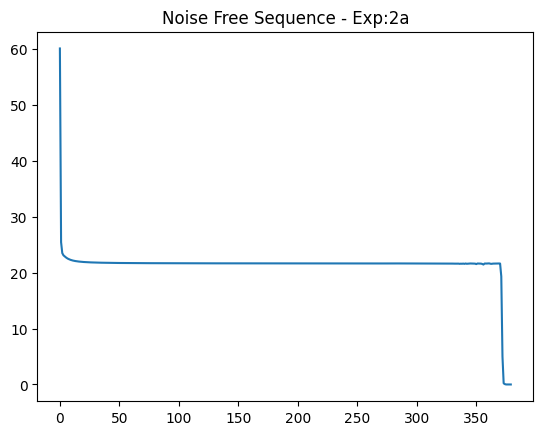

In [37]:
#Training Loop
p_value = 100

#Parameters
INPUT_SIZE = p_value+1
HIDDEN_SIZE = 20
LAYERS = 1
OUTPUT_SIZE = p_value+1

LSTM = MewralOldLSTM(INPUT_SIZE, HIDDEN_SIZE, LAYERS, OUTPUT_SIZE, optimizer="sgd")
LSTM.shift_baises(-0.5,-0.5)

EPOCHS = 1000
LEARNING_RATE = 1.0

X_train, y_train, range_length = generate_noise_free_sequence(50, p_value)
loss_history = []
for epoch in range(EPOCHS):
    total_epoch_loss = 0

    for i in range(len(X_train)):
        x_seq = X_train[i]
        y_seq = y_train[i]
        LSTM.last_batch_short_term_memory = None
        
        loss = LSTM.BPTT(x_seq, y_seq, learning_rate=LEARNING_RATE, loss_mode="last_step", retain_state=False)


        total_epoch_loss +=loss

    if epoch % 20 == 0:
        avg_loss = total_epoch_loss / len(X_train)
        acc = test_tunnel(LSTM, X_train, y_train)
        print(f"Epoch {epoch}: Loss = {avg_loss:.4f} | Exit Accuracy: {acc:.1f}%")
        if acc >99.0:
            break


    loss_history.append(total_epoch_loss)
    

        
plt.plot(loss_history)
plt.title("Noise Free Sequence - Exp:2a")
plt.show()




In [ ]:
X_test, y_test, _ = generate_noise_free_sequence(50, p_value)
acc_test = test_tunnel(LSTM, X_test, y_test)
print(f"Accuracy on Fresh Test Data:         {acc_test:.1f}%")

Accuracy on Fresh Test Data:         100.0%


Starting RNN Control Group Test...
Epoch 0: Loss = 0.3016 | Exit Accuracy: 62.0%
Epoch 100: Loss = 0.2461 | Exit Accuracy: 62.0%
Epoch 200: Loss = 0.2461 | Exit Accuracy: 62.0%
Epoch 300: Loss = 0.2461 | Exit Accuracy: 62.0%
Epoch 400: Loss = 0.2461 | Exit Accuracy: 62.0%
Epoch 500: Loss = 0.2461 | Exit Accuracy: 62.0%
Epoch 600: Loss = 0.2461 | Exit Accuracy: 62.0%
Epoch 700: Loss = 0.2461 | Exit Accuracy: 62.0%
Epoch 800: Loss = 0.2461 | Exit Accuracy: 62.0%
Epoch 900: Loss = 0.2461 | Exit Accuracy: 62.0%


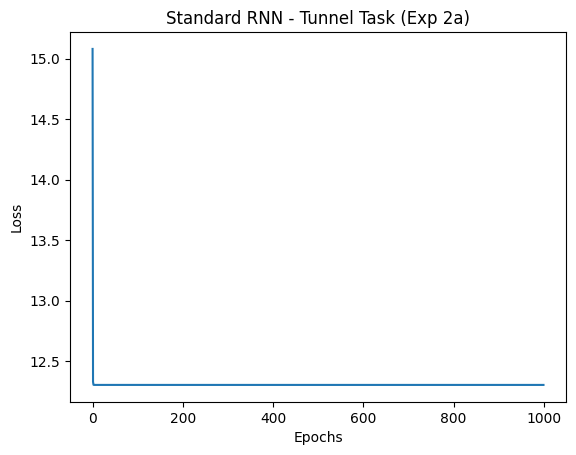

In [23]:
# Initialize Standard RNN
from StandardRNN import RecurrentMewralNet
RNN = RecurrentMewralNet(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, initialzation="random")

p_value = 100
X_train, y_train, range_length = generate_noise_free_sequence(50, p_value)
EPOCHS = 1000
LEARNING_RATE = 0.05

loss_history = []

print("Starting RNN Control Group Test...")

for epoch in range(EPOCHS):
    total_epoch_loss = 0

    for i in range(len(X_train)):
        x_seq = X_train[i]
        y_seq = y_train[i]
        
        loss = RNN.BPTT(x_seq, y_seq, learning_rate=LEARNING_RATE, loss_mask="last_step")
        total_epoch_loss += loss

    loss_history.append(total_epoch_loss)

    if epoch % 100 == 0:
        avg_loss = total_epoch_loss / len(X_train)
        
        acc = test_tunnel(RNN, X_train, y_train) 
        
        print(f"Epoch {epoch}: Loss = {avg_loss:.4f} | Exit Accuracy: {acc:.1f}%")
        
        # Standard RNNs usually stall at 50% (random guessing)
        if acc > 99.0:
            print("Converged! (This would be a miracle for T=100)")
            break

import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.title("Standard RNN - Tunnel Task (Exp 2a)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [6]:
import random
import matplotlib.pyplot as plt
from MewralLSTM import MewralOldLSTM
import numpy as np

In [27]:
def generate_2b_hard_mode(num_samples, p_value):
    X_list = [] 
    y_list = [] 
    
    class_x_start = p_value
    class_y_start = p_value + 1
    
    # --- THE FIX: A neutral token that gives NO info ---
    NEUTRAL_END_TOKEN = p_value + 2
    range_length = p_value + 3 

    for _ in range(num_samples):
        is_class_x = random.choice([True, False])
        
        start_token = class_x_start if is_class_x else class_y_start
        
        # Middle: Noise (1 to 99)
        middle_part = np.random.randint(low=1, high=p_value, size=p_value-1)
        
        # --- THE FIX: Sequence always ends with 102 ---
        index_sequences = [start_token] + list(middle_part) + [NEUTRAL_END_TOKEN]
        
        seq_length = len(index_sequences)
        
        x_seq = np.zeros((seq_length - 1, 1, range_length))
        y_seq = np.zeros((seq_length - 1, 1, range_length))

        for t in range(seq_length-1):
            curr = index_sequences[t]
            x_seq[t, 0, curr] = 1.0
            
            # Target is the Class (Start Token)
            if t == seq_length - 2: 
                target_idx = class_x_start if is_class_x else class_y_start
                y_seq[t, 0, target_idx] = 1.0

        X_list.append(x_seq)
        y_list.append(y_seq)
    
    return X_list, y_list, range_length

Epoch 0: Loss = 1.2525 | Exit Accuracy: 54.0%
Epoch 20: Loss = 0.4044 | Exit Accuracy: 46.0%
Epoch 40: Loss = 0.3406 | Exit Accuracy: 52.0%
Epoch 60: Loss = 0.3473 | Exit Accuracy: 48.0%
Epoch 80: Loss = 0.3859 | Exit Accuracy: 46.0%
Epoch 100: Loss = 0.4281 | Exit Accuracy: 50.0%
Epoch 120: Loss = 0.3540 | Exit Accuracy: 52.0%
Epoch 140: Loss = 0.3657 | Exit Accuracy: 50.0%
Epoch 160: Loss = 0.4223 | Exit Accuracy: 54.0%
Epoch 180: Loss = 0.4323 | Exit Accuracy: 52.0%
Epoch 200: Loss = 0.4212 | Exit Accuracy: 50.0%
Epoch 220: Loss = 0.4404 | Exit Accuracy: 50.0%
Epoch 240: Loss = 0.3698 | Exit Accuracy: 66.0%
Epoch 260: Loss = 0.3579 | Exit Accuracy: 58.0%
Epoch 280: Loss = 0.3456 | Exit Accuracy: 48.0%
Epoch 300: Loss = 0.4029 | Exit Accuracy: 58.0%
Epoch 320: Loss = 0.4415 | Exit Accuracy: 46.0%
Epoch 340: Loss = 0.4563 | Exit Accuracy: 48.0%
Epoch 360: Loss = 0.3571 | Exit Accuracy: 56.0%
Epoch 380: Loss = 0.3820 | Exit Accuracy: 62.0%
Epoch 400: Loss = 0.3892 | Exit Accuracy: 44.0

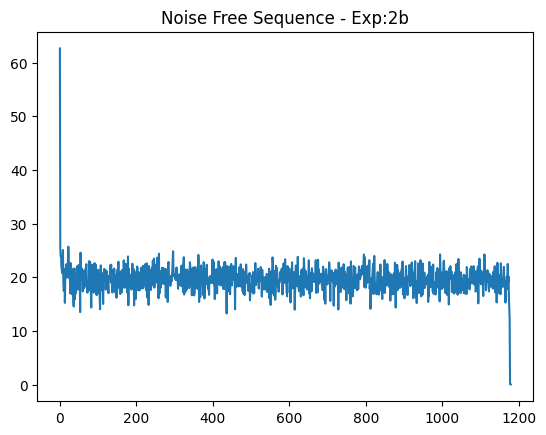

In [41]:
#Training Loop
p_value = 100

#Parameters
INPUT_SIZE = p_value+3
HIDDEN_SIZE = 20
LAYERS = 1
OUTPUT_SIZE = p_value+3

LSTM = MewralOldLSTM(INPUT_SIZE, HIDDEN_SIZE, LAYERS, OUTPUT_SIZE, optimizer="sgd")
LSTM.shift_baises(-0.5,-0.5)

EPOCHS = 4000
LEARNING_RATE = 1.0

loss_history = []
for epoch in range(EPOCHS):
    X_train, y_train, range_length = generate_2b_hard_mode(50, p_value)
    total_epoch_loss = 0

    for i in range(len(X_train)):
        x_seq = X_train[i]
        y_seq = y_train[i]
        LSTM.last_batch_short_term_memory = None
        
        loss = LSTM.BPTT(x_seq, y_seq, learning_rate=LEARNING_RATE, loss_mode="last_step", retain_state=False)


        total_epoch_loss +=loss

    if epoch % 20 == 0:
        avg_loss = total_epoch_loss / len(X_train)
        acc = test_tunnel(LSTM, X_train, y_train)
        print(f"Epoch {epoch}: Loss = {avg_loss:.4f} | Exit Accuracy: {acc:.1f}%")
        if acc >99.0:
            break


    loss_history.append(total_epoch_loss)
    

        
plt.plot(loss_history)
plt.title("Noise Free Sequence - Exp:2b")
plt.show()



In [43]:
X_test, y_test, _ = generate_2b_hard_mode(50, p_value)
acc_test = test_tunnel(LSTM, X_test, y_test)
print(f"Accuracy on Fresh Test Data:         {acc_test:.1f}%")

Accuracy on Fresh Test Data:         100.0%


Starting RNN Control Group Test...
Epoch 0: Loss = 0.2723 | Exit Accuracy: 51.0%
Epoch 100: Loss = 0.2567 | Exit Accuracy: 47.0%
Epoch 200: Loss = 0.2598 | Exit Accuracy: 48.5%
Epoch 300: Loss = 0.2591 | Exit Accuracy: 52.5%
Epoch 400: Loss = 0.2565 | Exit Accuracy: 49.0%
Epoch 500: Loss = 0.2581 | Exit Accuracy: 49.5%
Epoch 600: Loss = 0.2549 | Exit Accuracy: 54.5%
Epoch 700: Loss = 0.2487 | Exit Accuracy: 60.0%
Epoch 800: Loss = 0.2556 | Exit Accuracy: 47.5%
Epoch 900: Loss = 0.2582 | Exit Accuracy: 48.0%
Epoch 1000: Loss = 0.2568 | Exit Accuracy: 55.0%
Epoch 1100: Loss = 0.2534 | Exit Accuracy: 44.0%
Epoch 1200: Loss = 0.2531 | Exit Accuracy: 57.5%
Epoch 1300: Loss = 0.2608 | Exit Accuracy: 51.5%
Epoch 1400: Loss = 0.2593 | Exit Accuracy: 50.0%
Epoch 1500: Loss = 0.2607 | Exit Accuracy: 50.0%
Epoch 1600: Loss = 0.2549 | Exit Accuracy: 50.0%
Epoch 1700: Loss = 0.2590 | Exit Accuracy: 52.5%
Epoch 1800: Loss = 0.2577 | Exit Accuracy: 53.0%
Epoch 1900: Loss = 0.2582 | Exit Accuracy: 48.

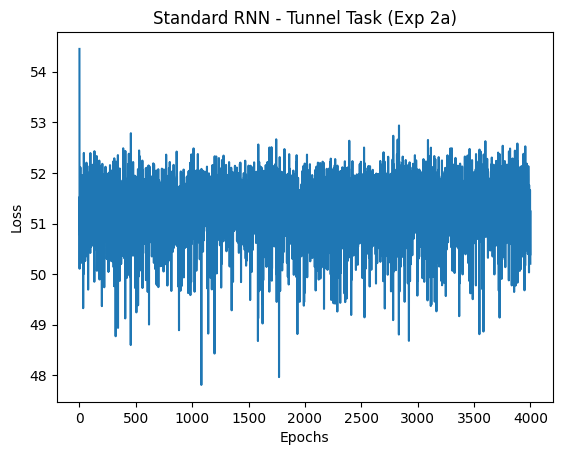

In [46]:
# Initialize Standard RNN
from StandardRNN import RecurrentMewralNet
def test_tunnelRNN(model, X_list, Y_list):
    correct_exits = 0
    total = len(X_list)
    
    for i in range(total):
        outputs, _ = model.forward(X_list[i])
        
        last_pred = np.argmax(outputs[-1][0])
        last_target = np.argmax(Y_list[i][-1][0])
        
        if last_pred == last_target:
            correct_exits += 1
            
    acc = (correct_exits / total) * 100
    return acc


p_value = 100
EPOCHS = 4000
LEARNING_RATE = 0.05
INPUT_SIZE = p_value+3
HIDDEN_SIZE = 20
OUTPUT_SIZE = p_value+3

loss_history = []
RNN = RecurrentMewralNet(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, initialzation="random")

print("Starting RNN Control Group Test...")

for epoch in range(EPOCHS):
    X_train, y_train, range_length = generate_2b_hard_mode(200, p_value)
    total_epoch_loss = 0

    for i in range(len(X_train)):
        x_seq = X_train[i]
        y_seq = y_train[i]
        
        loss = RNN.BPTT(x_seq, y_seq, learning_rate=LEARNING_RATE, loss_mask="last_step")
        total_epoch_loss += loss

    loss_history.append(total_epoch_loss)

    if epoch % 100 == 0:
        avg_loss = total_epoch_loss / len(X_train)
        
        acc = test_tunnelRNN(RNN, X_train, y_train) 
        
        print(f"Epoch {epoch}: Loss = {avg_loss:.4f} | Exit Accuracy: {acc:.1f}%")
        
        # Standard RNNs usually stall at 50% (random guessing)
        if acc > 99.0:
            print("Converged! (This would be a miracle for T=100)")
            break

import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.title("Standard RNN - Tunnel Task (Exp 2a)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
print("--- THE TRUTH REVEALED ---")

# 1. Test on the Data it Memorized (X_train)
acc_train = test_tunnelRNN(RNN, X_train, y_train)
print(f"Accuracy on Memorized Training Data: {acc_train:.1f}%")

# 2. Test on Fresh Data (X_test)
# The model has NEVER seen these random noise patterns before.
X_test, y_test, _ = generate_2b_hard_mode(50, p_value)
acc_test = test_tunnelRNN(RNN, X_test, y_test)
print(f"Accuracy on Fresh Test Data:         {acc_test:.1f}%")


In [14]:
import numpy as np
import random
from MewralLSTM import MewralOldLSTM
import matplotlib.pyplot as plt

def generate_experiment_2c(num_samples, p_value, q_value=10):

    X_list = [] 
    y_list = [] 
    
    NOISE_START, NOISE_END = 0, p_value 
    TRIGGER_E = p_value
    START_B   = p_value + 1
    CLASS_X   = p_value + 2
    CLASS_Y   = p_value + 3
    
    range_length = p_value + 4

    for _ in range(num_samples):
        is_class_x = random.choice([True, False])

        current_class_symbol = CLASS_X if is_class_x else CLASS_Y
        sequence = [START_B, current_class_symbol]
        
        prefix = np.random.randint(low=NOISE_START, high=NOISE_END, size=q_value)
        sequence.extend(prefix)
        
        while True:
            if random.random() < 0.1: # 10% chance to END
                sequence.append(TRIGGER_E)
                break
            else: # 90% chance to CONTINUE NOISE
                noise_char = np.random.randint(low=NOISE_START, high=NOISE_END)
                sequence.append(noise_char)
        
        sequence.append(current_class_symbol)

        seq_len = len(sequence)
        
        x_seq = np.zeros((seq_len - 1, 1, range_length))
        y_seq = np.zeros((seq_len - 1, 1, range_length))
        
        for t in range(seq_len - 1):
            curr_char = sequence[t]
            next_char = sequence[t+1]
            
            x_seq[t, 0, curr_char] = 1.0
            
            y_seq[t, 0, next_char] = 1.0

        X_list.append(x_seq)
        y_list.append(y_seq)
        
    return X_list, y_list, range_length

def test_tunnel(model, X_list, Y_list):
    correct_exits = 0
    total = len(X_list)
    
    for i in range(total):
        model.last_batch_short_term_memory = None
        outputs, _, _ = model.forward(X_list[i], retain_state=False)
        
        last_pred = np.argmax(outputs[-1][0])
        last_target = np.argmax(Y_list[i][-1][0])
        
        if last_pred == last_target:
            correct_exits += 1
            
    acc = (correct_exits / total) * 100
    return acc


Epoch 0: Loss = 0.9969 | Exit Accuracy: 56.0%
Epoch 20: Loss = 0.4285 | Exit Accuracy: 50.0%
Epoch 40: Loss = 0.0008 | Exit Accuracy: 100.0%


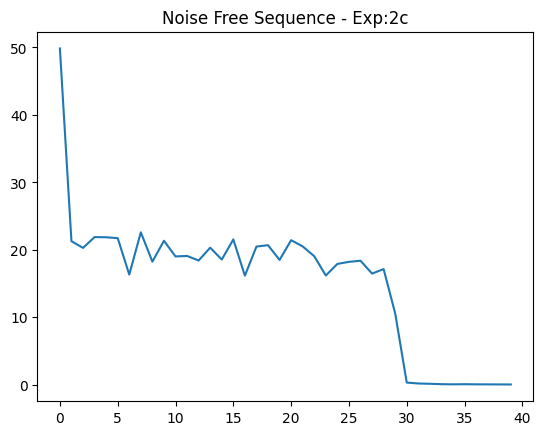

In [16]:
#Training Loop
p_value = 100

#Parameters
INPUT_SIZE = p_value+4
HIDDEN_SIZE = 20
LAYERS = 1
OUTPUT_SIZE = p_value+4

LSTM = MewralOldLSTM(INPUT_SIZE, HIDDEN_SIZE, LAYERS, OUTPUT_SIZE, optimizer="sgd")
LSTM.shift_baises(-0.5,-0.5)

EPOCHS = 4000
LEARNING_RATE = 1.0

loss_history = []
for epoch in range(EPOCHS):
    X_train, y_train, range_length = generate_experiment_2c(50, p_value)
    total_epoch_loss = 0

    for i in range(len(X_train)):
        x_seq = X_train[i]
        y_seq = y_train[i]
        LSTM.last_batch_short_term_memory = None
        
        loss = LSTM.BPTT(x_seq, y_seq, learning_rate=LEARNING_RATE, loss_mode="last_step", retain_state=False)


        total_epoch_loss +=loss

    if epoch % 20 == 0:
        avg_loss = total_epoch_loss / len(X_train)
        acc = test_tunnel(LSTM, X_train, y_train)
        print(f"Epoch {epoch}: Loss = {avg_loss:.4f} | Exit Accuracy: {acc:.1f}%")
        if acc >99.0:
            break


    loss_history.append(total_epoch_loss)
    
plt.plot(loss_history)
plt.title("Noise Free Sequence - Exp:2c")
plt.show()



In [17]:
print("--- STRESS TEST: GENERALIZATION ---")

# 1. Generate "Impossible" Data (Length ~100 instead of ~10)
# Note: q_value sets the MINIMUM noise length.
X_stress, y_stress, _ = generate_experiment_2c(num_samples=50, p_value=100, q_value=100)

print(f"Average Stress Sequence Length: {np.mean([len(x) for x in X_stress]):.1f}")

# 2. Test the LSTM (without retraining)
acc = test_tunnel(LSTM, X_stress, y_stress)
print(f"Accuracy on 10x Longer Sequences: {acc:.1f}%")

--- STRESS TEST: GENERALIZATION ---
Average Stress Sequence Length: 112.8
Accuracy on 10x Longer Sequences: 100.0%


Starting RNN Control Group Test...
Epoch 0: Loss = 0.2689 | Exit Accuracy: 48.0%
Epoch 100: Loss = 0.2586 | Exit Accuracy: 50.0%
Epoch 200: Loss = 0.2524 | Exit Accuracy: 46.5%
Epoch 300: Loss = 0.2572 | Exit Accuracy: 55.0%
Epoch 400: Loss = 0.2603 | Exit Accuracy: 51.5%
Epoch 500: Loss = 0.2566 | Exit Accuracy: 52.0%
Epoch 600: Loss = 0.2586 | Exit Accuracy: 48.0%
Epoch 700: Loss = 0.2588 | Exit Accuracy: 52.0%
Epoch 800: Loss = 0.2515 | Exit Accuracy: 54.0%
Epoch 900: Loss = 0.2505 | Exit Accuracy: 55.0%
Epoch 1000: Loss = 0.2589 | Exit Accuracy: 48.0%
Epoch 1100: Loss = 0.2561 | Exit Accuracy: 47.0%
Epoch 1200: Loss = 0.2535 | Exit Accuracy: 56.0%
Epoch 1300: Loss = 0.2548 | Exit Accuracy: 57.0%
Epoch 1400: Loss = 0.2563 | Exit Accuracy: 54.0%
Epoch 1500: Loss = 0.2572 | Exit Accuracy: 51.5%
Epoch 1600: Loss = 0.2568 | Exit Accuracy: 47.5%
Epoch 1700: Loss = 0.2559 | Exit Accuracy: 53.5%
Epoch 1800: Loss = 0.2593 | Exit Accuracy: 51.5%
Epoch 1900: Loss = 0.2556 | Exit Accuracy: 50.

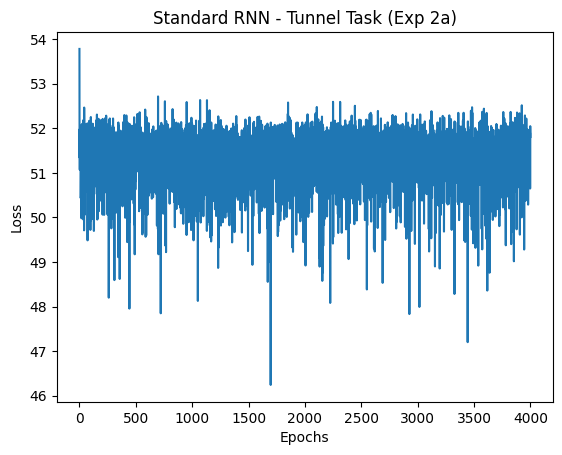

In [18]:
# Initialize Standard RNN
from StandardRNN import RecurrentMewralNet
def test_tunnelRNN(model, X_list, Y_list):
    correct_exits = 0
    total = len(X_list)
    
    for i in range(total):
        outputs, _ = model.forward(X_list[i])
        
        last_pred = np.argmax(outputs[-1][0])
        last_target = np.argmax(Y_list[i][-1][0])
        
        if last_pred == last_target:
            correct_exits += 1
            
    acc = (correct_exits / total) * 100
    return acc


p_value = 100
EPOCHS = 4000
LEARNING_RATE = 0.05
INPUT_SIZE = p_value+4
HIDDEN_SIZE = 20
OUTPUT_SIZE = p_value+4

loss_history = []
RNN = RecurrentMewralNet(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, initialzation="random")

print("Starting RNN Control Group Test...")

for epoch in range(EPOCHS):
    X_train, y_train, range_length = generate_experiment_2c(200, p_value)
    total_epoch_loss = 0

    for i in range(len(X_train)):
        x_seq = X_train[i]
        y_seq = y_train[i]
        
        loss = RNN.BPTT(x_seq, y_seq, learning_rate=LEARNING_RATE, loss_mask="last_step")
        total_epoch_loss += loss

    loss_history.append(total_epoch_loss)

    if epoch % 100 == 0:
        avg_loss = total_epoch_loss / len(X_train)
        
        acc = test_tunnelRNN(RNN, X_train, y_train) 
        
        print(f"Epoch {epoch}: Loss = {avg_loss:.4f} | Exit Accuracy: {acc:.1f}%")
        
        # Standard RNNs usually stall at 50% (random guessing)
        if acc > 99.0:
            print("Converged! (This would be a miracle for T=100)")
            break

import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.title("Standard RNN - Tunnel Task (Exp 2a)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [19]:
print("--- STRESS TEST: GENERALIZATION ---")

# 1. Generate "Impossible" Data (Length ~100 instead of ~10)
# Note: q_value sets the MINIMUM noise length.
X_stress, y_stress, _ = generate_experiment_2c(num_samples=50, p_value=100, q_value=100)

print(f"Average Stress Sequence Length: {np.mean([len(x) for x in X_stress]):.1f}")

# 2. Test the LSTM (without retraining)
acc = test_tunnelRNN(RNN, X_stress, y_stress)
print(f"Accuracy on 10x Longer Sequences: {acc:.1f}%")

--- STRESS TEST: GENERALIZATION ---
Average Stress Sequence Length: 114.1
Accuracy on 10x Longer Sequences: 60.0%
